In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import numpy as np
from tqdm import tqdm
from matplotlib.pyplot import figure

In [2]:
def drop_indexies(data):
    data.index = np.arange(len(data))
    
def get_year(row):
    return str(row.year)

def get_month(row):
    return str(row.month)

def get_season(row):
    if row.month in [12, 1, 2]:
        return '1-winter'
    if row.month in [3, 4, 5]:
        return '2-spring'
    if row.month in [6, 7, 8]:
        return '3-summer'
    if row.month in [9, 10, 11]:
        return '4-autumn'
    
def get_field(data):
    for i in data.index:
        fields_list = data['fields'][i]
        for field in fields_list:
            data[field][i] = 1

In [3]:
fields = {0 : 'Математика',
         1 : 'Биоинформатика',
         2 : 'Железо, электроника',
         3 : 'Сетевые технологии, администрирование, devops',
         4 : 'Проектирование, тестирование',
         5 : 'Информационная безопасность',
         6 : 'Маркетинг, контекстная реклама',
         7 : 'Верстка, html, javascript',
         8 : 'Машинное обучение',
         9 : 'E-commerce, финансы',
         10 : 'Дизайн интерфейсов',
         11 : 'Бизнес, CRM',
         12 : 'SEO'}

In [4]:
stepik = pd.read_json('/Users/alexandrasorokovikova/Data Science/НИР Сравнение IT/Comparison-of-IT-trends/data/final_data/stepik_final.json')
stepik['time'] = pd.to_datetime(stepik['time'], format='%Y.%m.%d')
stepik['year'] = stepik['time'].apply(get_year)
stepik['month'] = stepik['time'].apply(get_month)
stepik['season'] = stepik['time'].apply(get_season)
stepik['year-season'] = stepik['year'] + '-' + stepik['season']
stepik.head()


,name,time,participants,price,fields,year,month,season,year-season
0,Основы программирования на R,2016-01-28 13:27:50,23325,0,[Машинное обучение],2016,1,1-winter,2016-1-winter
1,Python: основы и применение,2016-02-13 18:52:25,141336,0,"[Проектирование, тестирование]",2016,2,1-winter,2016-1-winter
2,Основы статистики. Часть 2,2016-02-19 14:47:08,38278,0,[Математика],2016,2,1-winter,2016-1-winter
3,Основы программирования для Linux,2016-03-01 13:25:31,23219,0,"[Проектирование, тестирование, Сетевые техноло...",2016,3,2-spring,2016-2-spring
4,Введение в молекулярную биологию и биомедицину,2016-03-02 11:07:11,39759,0,[Биоинформатика],2016,3,2-spring,2016-2-spring


In [35]:
def stat_df(data, fields_columns, stat_columns):
    df = pd.DataFrame(columns = ['year-season', 'field'] + stat_columns)
    for i in tqdm(data.index):
        for field in data['fields'][i]:
            number = ''
            if ',' in data['participants'][i]:
                number = data['participants'][i].split(',')[0] + data['participants'][i].split(',')[1]
            else:
                number = data['participants'][i]
            df.loc[len(df)] = [data['year-season'][i], field, number]
    return df


stepik_stat = stat_df(stepik, list(fields.values()), ['participants'])
stepik_stat['participants'] = stepik_stat['participants'].astype('float64')

100%|██████████| 1191/1191 [00:02<00:00, 416.42it/s]


In [34]:
def pivot_df(data, columns, values, func):
    df = pd.pivot_table(data, index = ['year-season'], columns = columns, values = values, aggfunc = func)
    df.columns = list(fields.values())
    df = df.fillna(0)

    for i in range(len(df)):
        df.iloc[i] = df.iloc[i]/sum(df.iloc[i])*100
    return df

In [32]:
def count_df(data):
    df = pd.DataFrame(index = list(data['year-season'].unique()), columns = list(fields.values()))
    for i in df.index:
        for column in df.columns:
            df.loc[i][column] = len(data[(data['year-season'] == i) & (data['field'] == column)])
            
    df = df.astype('float64')
    
    for i in range(len(df)):
        df.iloc[i] = df.iloc[i]/sum(df.iloc[i])*100
    
    return df

In [29]:
def plot_stat(data, title):
    for i in data.columns:
        figure(figsize=(10, 3), dpi=80)
        x = np.arange(data[i].size)
        fit = np.polyfit(x, data[i], deg=2)
        fit_function = np.poly1d(fit)
        y = fit_function(x)
        plt.plot(data[i].index, y, label=i)

        plt.plot(data.index, data[i], label=i)

        plt.xlabel('Year and season')
        plt.xticks(rotation = 90) 
        plt.ylabel('percent')
        plt.title(title)
        plt.legend()
        plt.grid()
        plt.show()

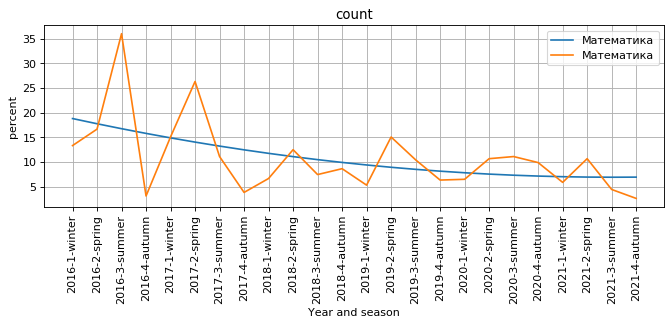

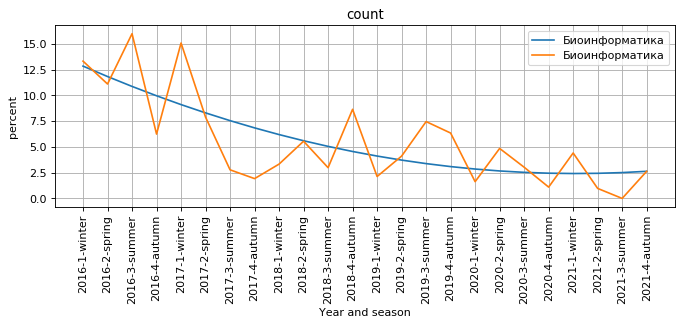

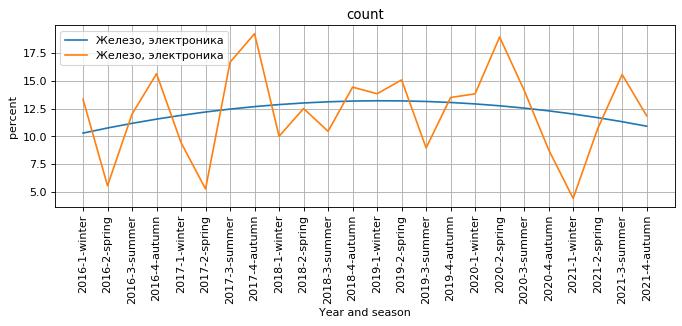

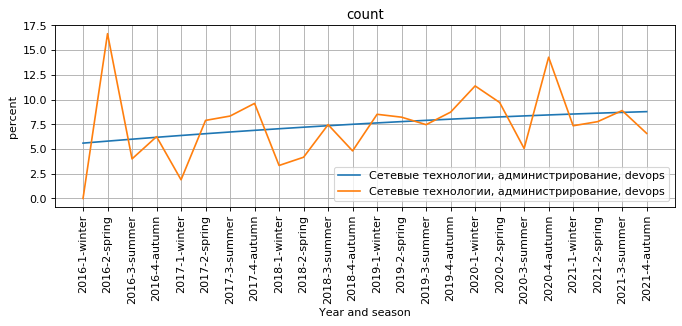

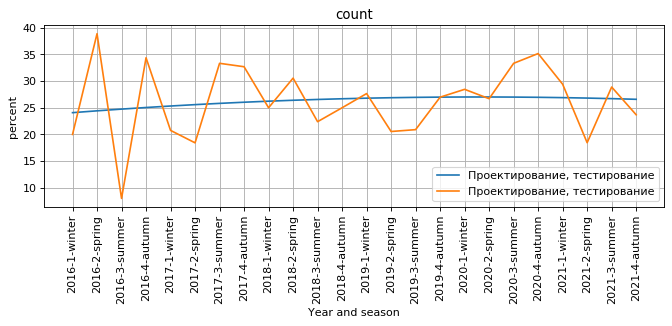

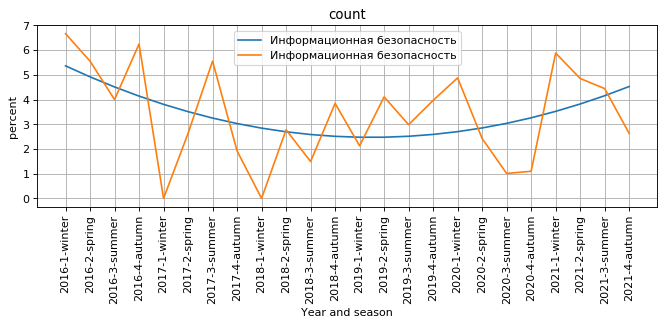

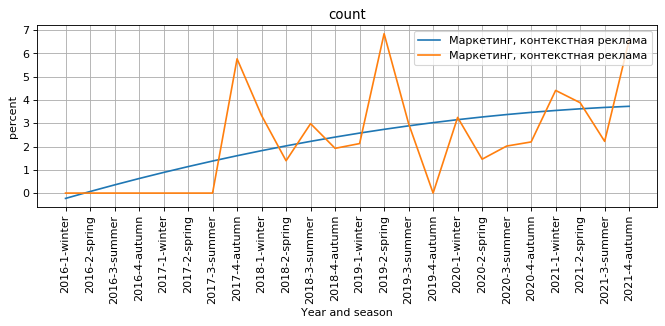

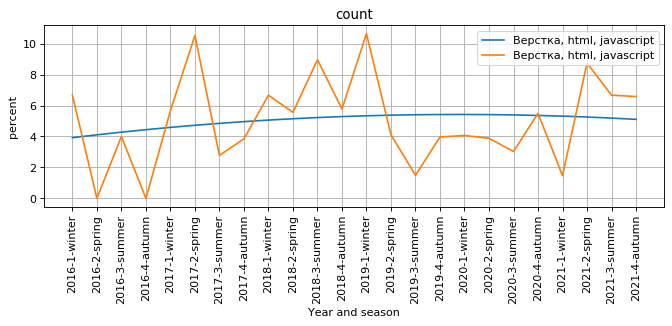

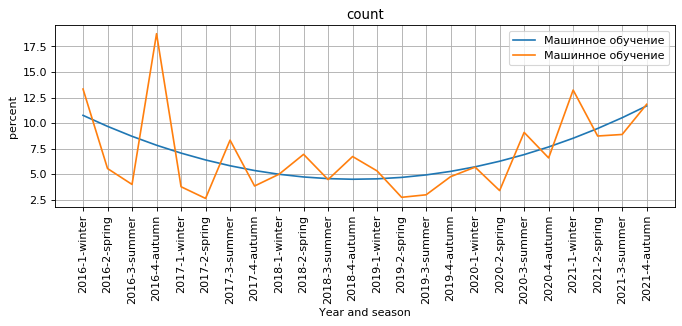

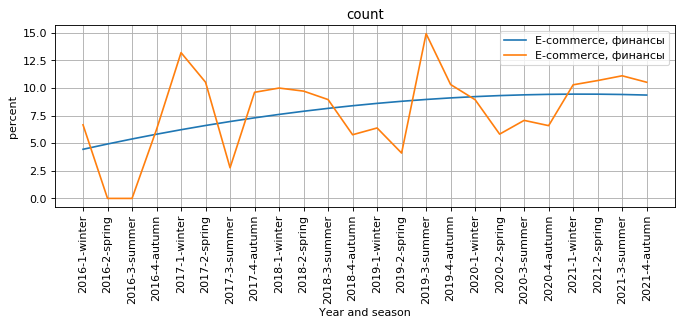

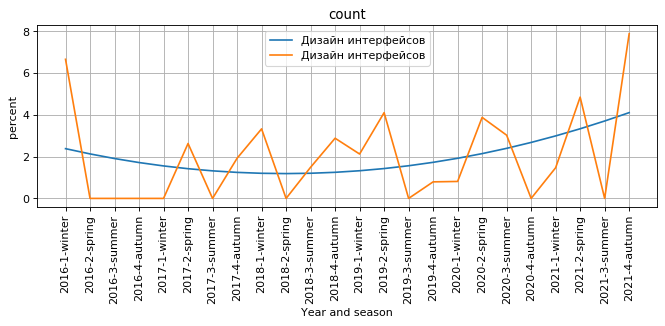

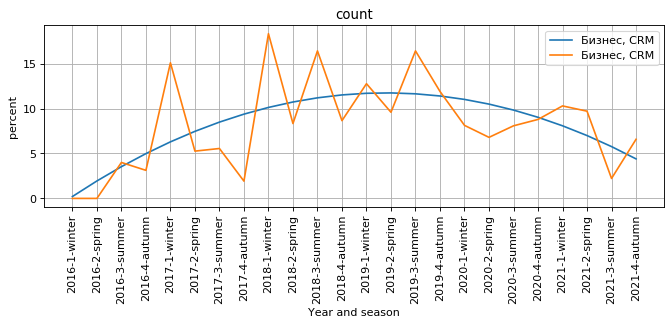

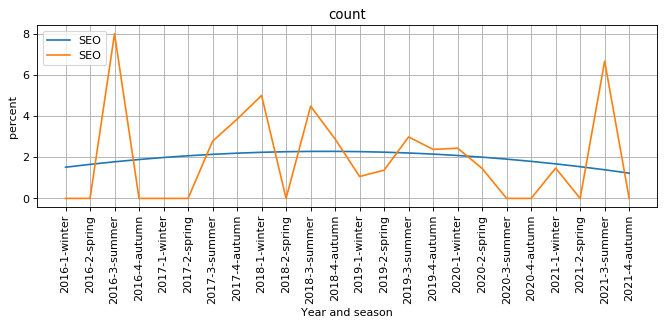

In [33]:
plot_stat(count_df(stepik_stat), 'count')

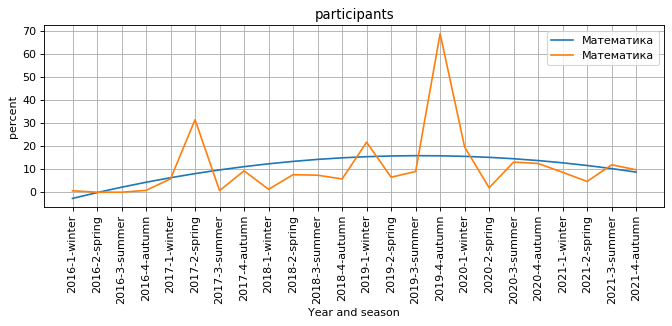

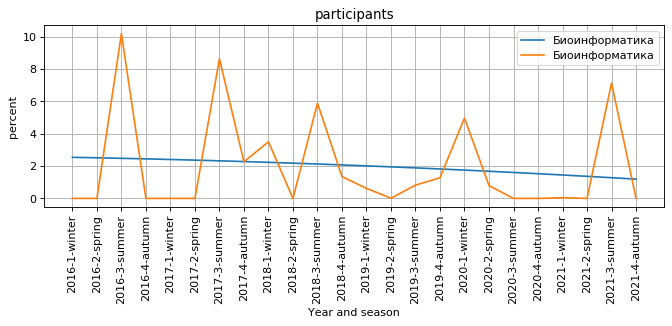

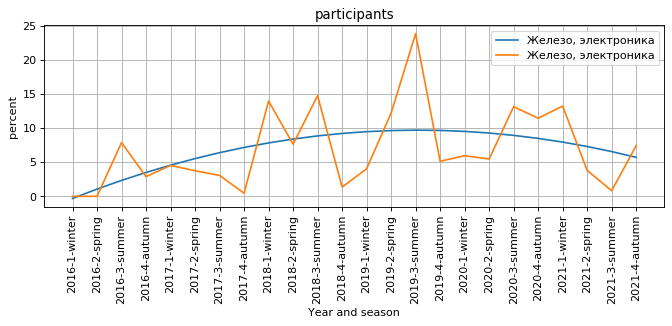

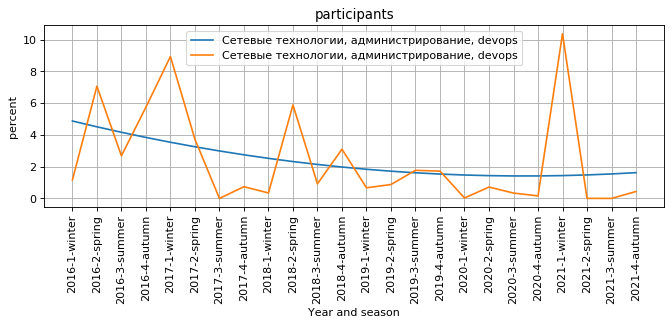

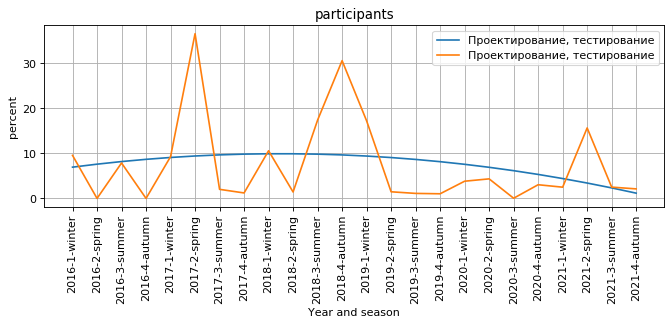

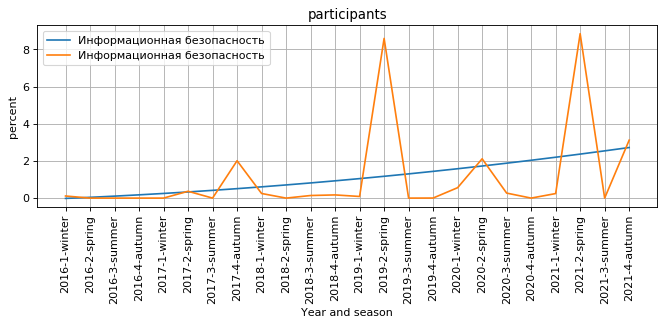

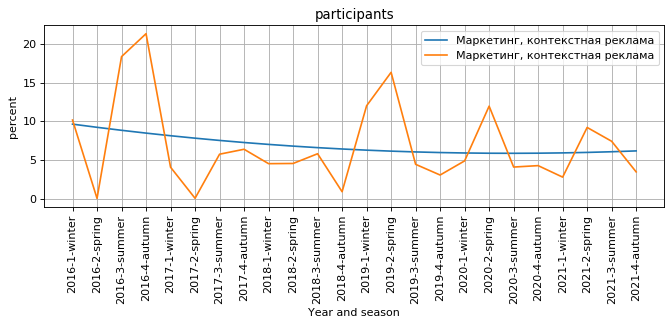

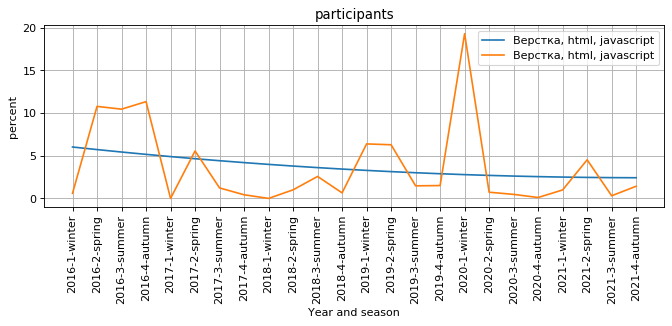

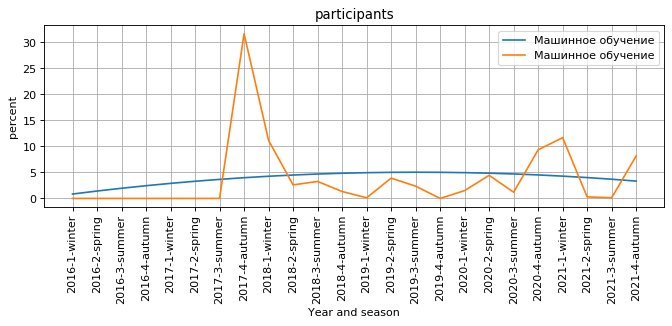

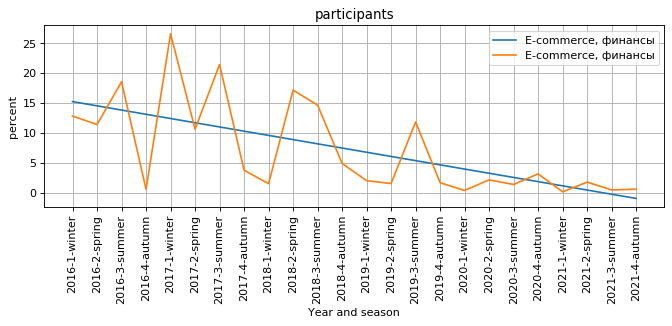

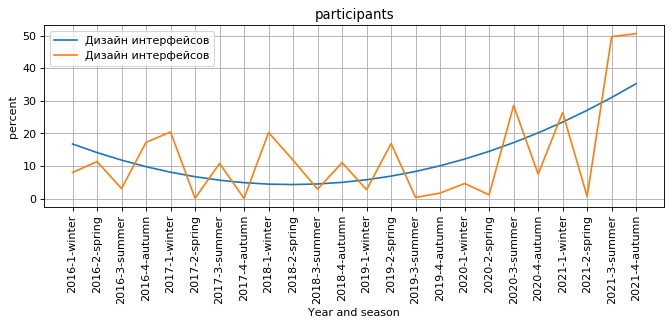

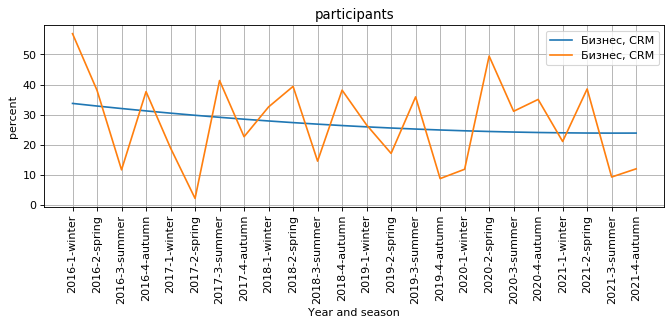

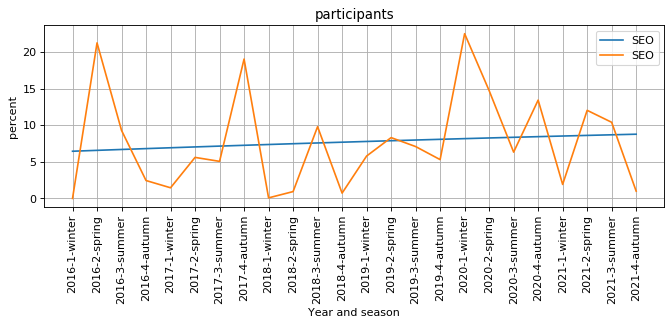

In [30]:
plot_stat(pivot_df(stepik_stat, ['field'], ['participants'], ['sum']), 'participants')